<a href="https://colab.research.google.com/github/salma-benzakour/Text-Classification-Judgment-Prediction/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("colab")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
merged_df = pd.read_pickle('drive/MyDrive/Data_Acquisition.pickle')

In [ ]:
merged_df['id'] = 1
df2 = pd.DataFrame(merged_df.groupby('Solution').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Solution'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% de décisions')),
    color='Solution'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.3%')
)

(bars + text).interactive().properties(
    height=300,
    width=700,
    title = "% de décisions par solution",
)

alt.LayerChart(...)

In [ ]:
df['News_length'] = df['Texte_Integral'].str.len()

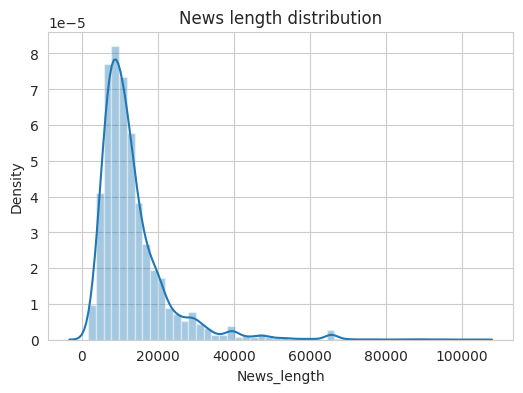

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df['News_length']).set_title('News length distribution');

In [ ]:
df['News_length'].describe()

count      5031.000000
mean      13210.188233
std        9199.154650
min        1771.000000
25%        7754.000000
50%       10831.000000
75%       15398.500000
max      102818.000000
Name: News_length, dtype: float64

In [ ]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

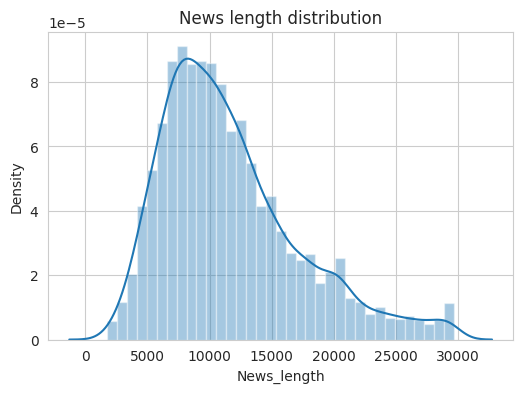

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df_95['News_length']).set_title('News length distribution');

In [ ]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

2846

In [ ]:
df['Solution'].value_counts()

Rejet                            3207
Satisfaction partielle            973
Satisfaction totale               515
Non-lieu                          192
Désistement                        59
Sursis à statuer                   37
Expertise / Médiation              37
Renvoi autres juridictions          5
Supplément d'instruction            4
Radiation du registre               1
Rejet défaut de doute sérieux       1
Name: Solution, dtype: int64

In [ ]:
df_more10k['Solution'].value_counts()

Rejet                         1756
Satisfaction partielle         692
Satisfaction totale            266
Non-lieu                        64
Sursis à statuer                34
Expertise / Médiation           25
Désistement                      5
Supplément d'instruction         3
Renvoi autres juridictions       1
Name: Solution, dtype: int64

<Axes: xlabel='Solution', ylabel='News_length'>

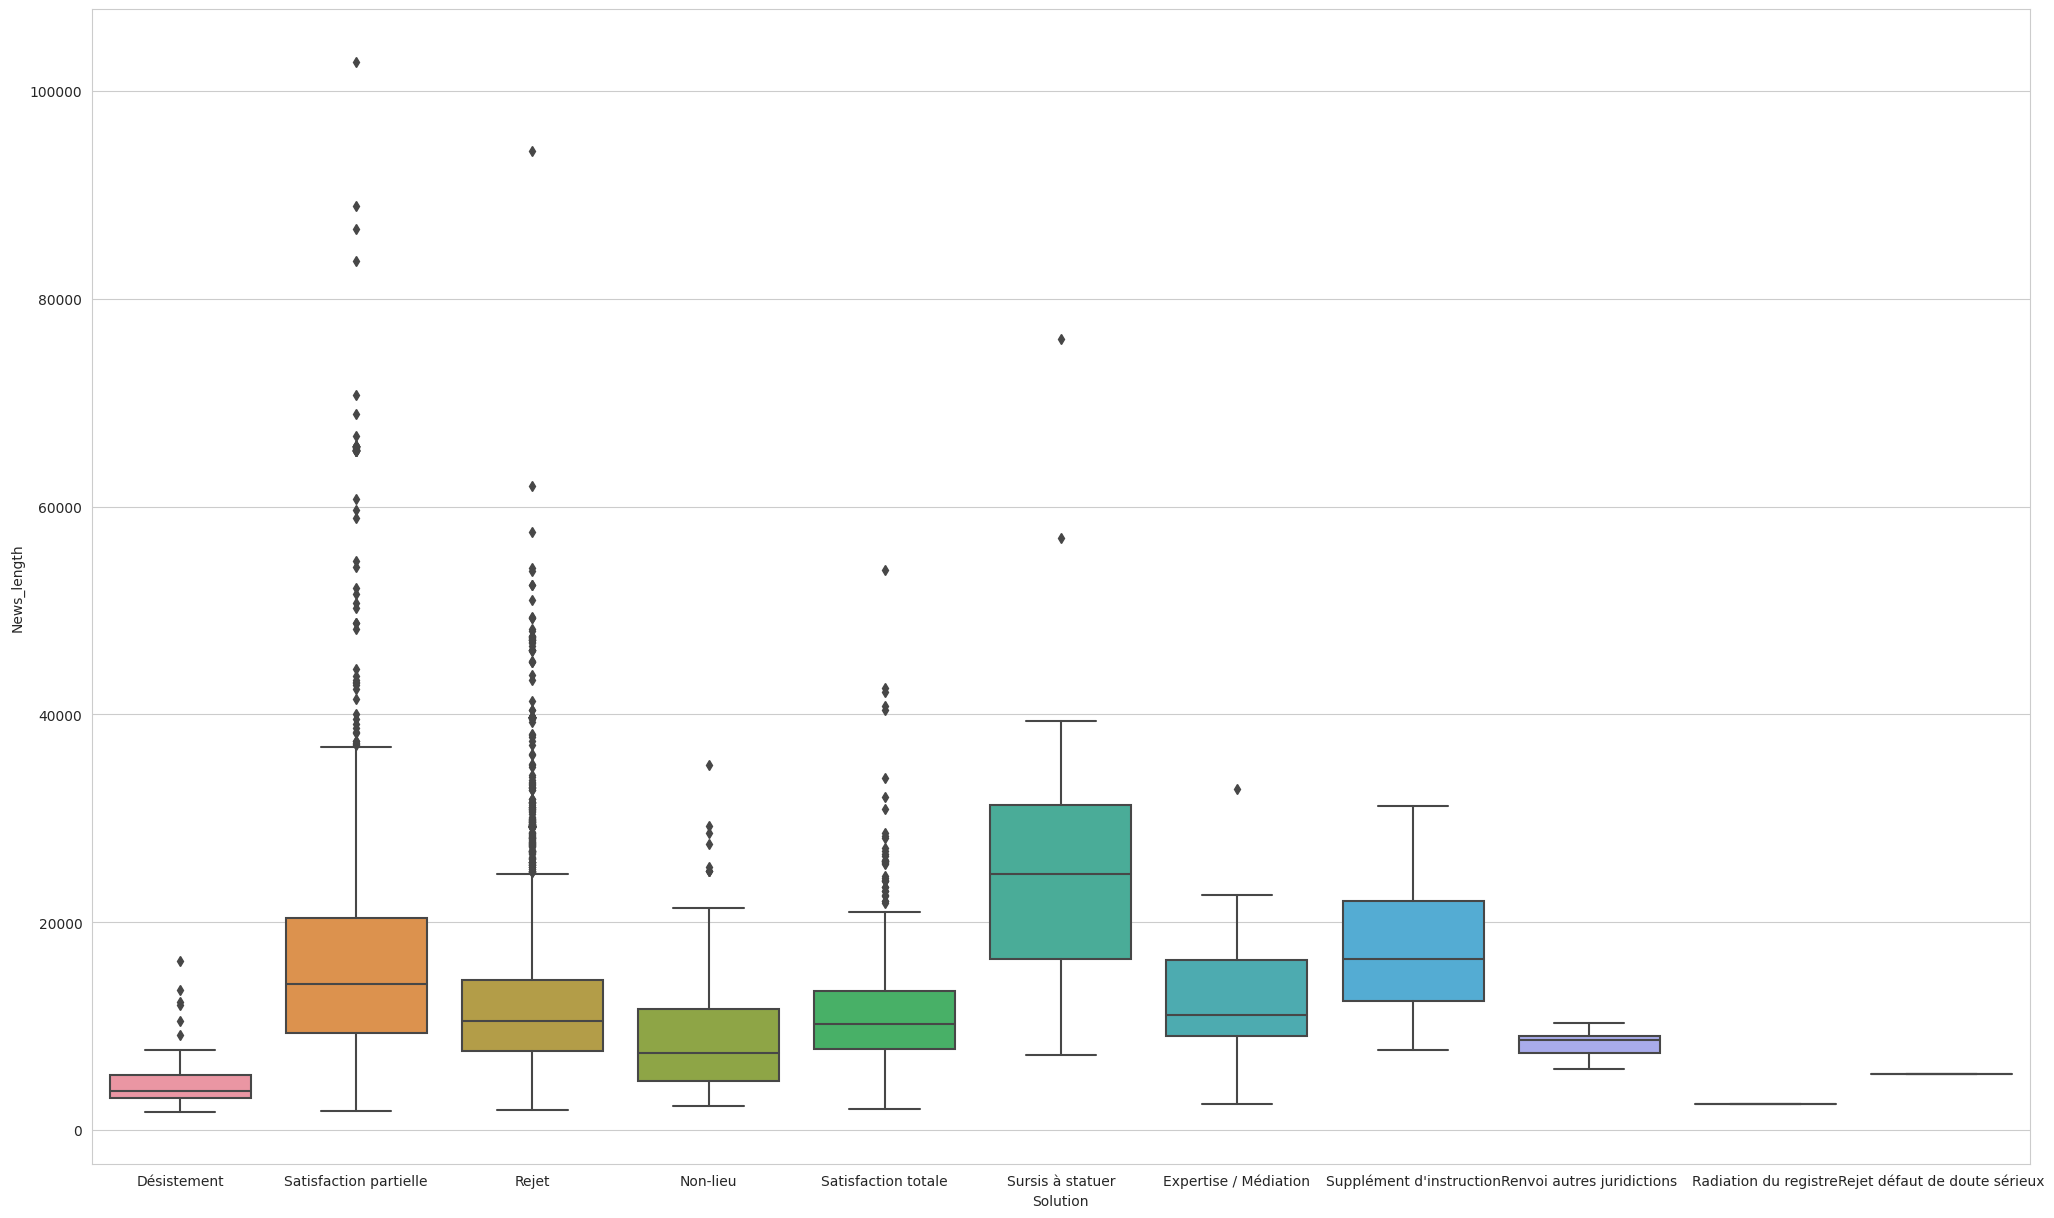

In [ ]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df, x='Solution', y='News_length', width=0.8)